# Text Preprocessing and Visualization for NLP

# BUSINESS PROBLEM
**A dataset containing Wikipedia texts will be analyzed through text preprocessing and visualization. The process will involve cleaning the texts, removing unnecessary words, and calculating word frequencies. The results will be presented using visualization techniques to highlight important information within the texts.**

# IMPORTINGS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [14]:
df=pd.read_csv("/Users/mustafaemircan/PycharmProjects/MiuulBootcamp/PROJECTS/NLP PROJECTS/Text Preprocessing and Visualization/wiki_data.csv", index_col=0)
df = df[:2000]

In [15]:
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [16]:
df.shape

(2000, 1)

# We created a function named `clean_text` for text preprocessing.

In [17]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=False)
    # Numbers
    text = text.str.replace('\d', '', regex=True)
    return text

In [18]:
df["text"] = clean_text(df["text"])

df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


# We wrote a function called `remove_stopwords` to remove unimportant words while performing feature extraction in the text.

In [19]:
def remove_stopwords(text):
    sw = stopwords.words("english")
    text = text.apply(lambda x: ' '.join(x for x in str(x).split() if x not in sw))
    return text

In [20]:
df["text"] = remove_stopwords(df["text"])

df.head()

,text
1,anovoanovo formerly novo computer services com...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june an...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


# We identified infrequent words in the text and removed them from the text.

In [21]:
delete = pd.Series(' '.join(df["text"]).split()).value_counts()[-1000:].head(10)

In [22]:
df["text"] = df["text"].apply(lambda x: ' '.join(x for x in x.split() if x not in delete))

df.head()

,text
1,anovoanovo formerly novo computer services com...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june an...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


# We tokenized the texts and observed the results.

In [23]:
df["text"].apply(lambda x: TextBlob(x).words).head()

1    [anovoanovo, formerly, novo, computer, service...
2    [battery, indicatora, battery, indicator, also...
3    [bob, peaserobert, allen, pease, august, â, â,...
4    [cavnetcavnet, secure, military, forum, became...
5    [clidarthe, clidar, scientific, instrument, us...
Name: text, dtype: object

# We performed lemmatization.

In [24]:
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

,text
1,anovoanovo formerly novo computer service comp...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pea august â â june anal...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


# TEXT VISUALIZATION

***We calculated the frequencies of the terms in the text.***

In [25]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.head()

,words,tf
0,rating,106.00
1,service,1341.00
2,company,2430.00
3,score,160.00
4,award,368.00


In [27]:
tf.sort_values("tf", ascending=False).head(10)

,words,tf
37,used,5543.00
49,system,5040.00
58,also,4207.00
596,one,3129.00
220,â,3022.00
62,use,3018.00
356,first,2821.00
41,may,2536.00
2,company,2430.00
172,time,2350.00


# BARPLOT

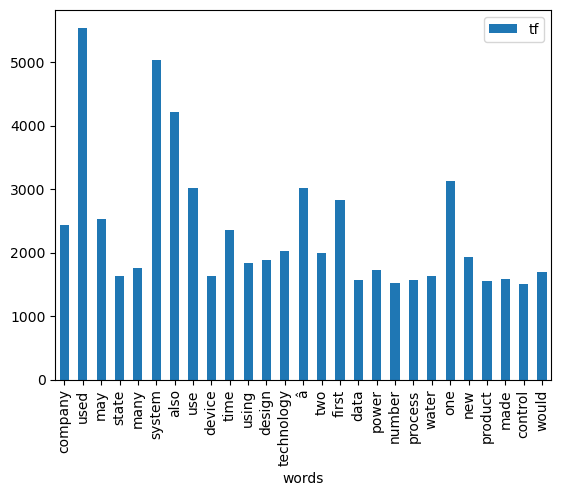

In [33]:
tf[tf["tf"] > 1500].plot.bar(x="words", y="tf")
plt.show()

# WORDCLOUD

In [38]:
text = ' '.join(i for i in df.text)

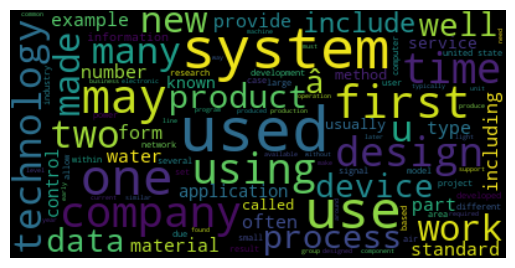

In [39]:
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# All operations are in a single function.

In [42]:
def wiki_preprocess(text, Barplot=False, Wordcloud=False):
    """
    Textler üzerinde ön işleme işlemleri yapar.

    :param text: DataFrame'deki textlerin olduğu değişken
    :param Barplot: Barplot görselleştirme
    :param Wordcloud: Wordcloud görselleştirme
    :return: text, tf (if Barplot is True)


    Example:
            wiki_preprocess(dataframe[col_name])

    """
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace('[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=False)
    # Numbers
    text = text.str.replace('\d', '', regex=True)
    # Stopwords
    sw = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    # Rarewords / Custom Words
    sil = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sil))

    if Barplot:
        # Terim Frekanslarının Hesaplanması
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        # Sütunların isimlendirilmesi
        tf.columns = ["words", "tf"]
        # 5000'den fazla geçen kelimelerin görselleştirilmesi
        tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
        plt.show()

        # tf dataframe'inin ilk 5 satırını göster
        print("TF DataFrame (İlk 5 satır):")
        print(tf.head())

    if Wordcloud:
        # Kelimeleri birleştirdik
        text_combined = " ".join(i for i in text)
        # wordcloud görselleştirmenin özelliklerini belirliyoruz
        wordcloud = WordCloud(max_font_size=50,
                              max_words=100,
                              background_color="white").generate(text_combined)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    # text dataframe'inin ilk 5 satırını göster
    print("Text DataFrame (İlk 5 satır):")
    print(text.head())

    return text, tf if Barplot else text

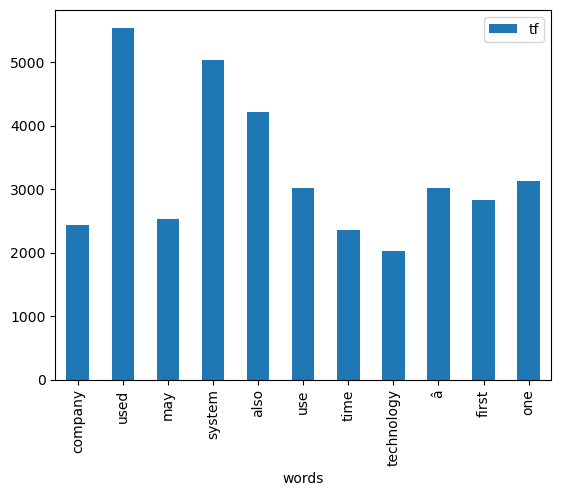

TF DataFrame (İlk 5 satır):
     words      tf
0   rating  106.00
1  service 1341.00
2  company 2430.00
3    score  160.00
4    award  368.00


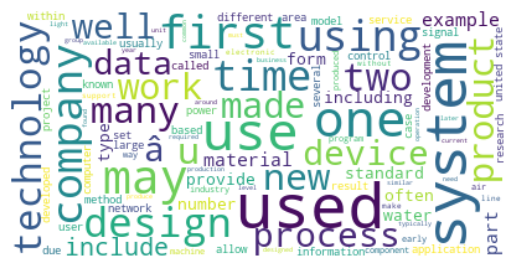

Text DataFrame (İlk 5 satır):
1    anovoanovo formerly novo computer service comp...
2    battery indicatora battery indicator also know...
3    bob peaserobert allen pea august â â june anal...
4    cavnetcavnet secure military forum became oper...
5    clidarthe clidar scientific instrument used me...
Name: text, dtype: object


(1       anovoanovo formerly novo computer service comp...
 2       battery indicatora battery indicator also know...
 3       bob peaserobert allen pea august â â june anal...
 4       cavnetcavnet secure military forum became oper...
 5       clidarthe clidar scientific instrument used me...
                               ...                        
 1996    edinburgh calotype clubthe edinburgh calotype ...
 1997    endrinendrin organochloride chemical formula c...
 1998    ethylene glycol dinitrateethylene glycol dinit...
 1999    forge de syamthe forge de syam syam forge forg...
 2000    frankkamenetskii theoryin combustion frankkame...
 Name: text, Length: 2000, dtype: object,
              words      tf
 0           rating  106.00
 1          service 1341.00
 2          company 2430.00
 3            score  160.00
 4            award  368.00
 ...            ...     ...
 75383     semyonov    1.00
 75384    laplacian    1.00
 75385     semenovs    1.00
 75386         isat    1.00
 

In [43]:
wiki_preprocess(df["text"], True, True)

# THANKS.